In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('social_media.csv')

In [3]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [4]:
df=df.iloc[: ,2:]

In [5]:
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=.2,random_state=0)

# Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# fit only train data
scaler.fit(x_train)
# trainsformation on both train and test data
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [8]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [9]:
# returning numpy array
x_train_scaled

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [10]:
# again converting into dataframe
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [11]:
x_train_scaled

Age  EstimatedSalary
0    1.922950         2.146016
1    2.020161         0.378719
2   -1.382215        -0.432499
3   -1.187794        -1.011940
4    1.922950        -0.925024
..        ...              ...
315  0.950843        -1.156800
316 -0.896162        -0.780164
317 -0.215686        -0.519415
318 -1.090583        -0.461471
319 -1.187794         1.392742

[320 rows x 2 columns]

# mean before scaling

In [12]:
np.round(x_train.describe(),1)

Age  EstimatedSalary
count  320.0            320.0
mean    38.2          69928.1
std     10.3          34570.1
min     18.0          15000.0
25%     30.0          43000.0
50%     38.0          69500.0
75%     46.0          88000.0
max     60.0         150000.0

# mean after scaling

In [13]:
np.round(x_train_scaled.describe(),1)

Age  EstimatedSalary
count  320.0            320.0
mean     0.0              0.0
std      1.0              1.0
min     -2.0             -1.6
25%     -0.8             -0.8
50%     -0.0             -0.0
75%      0.8              0.5
max      2.1              2.3

# effect of scaling

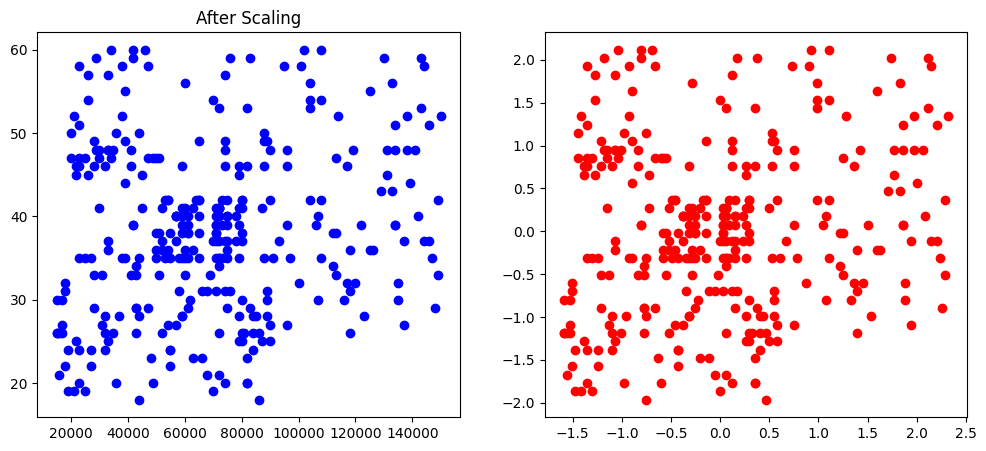

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['EstimatedSalary'],x_train['Age'],color='blue')
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['EstimatedSalary'],x_train_scaled['Age'],color='red')
ax1.set_title('After Scaling')
plt.show()

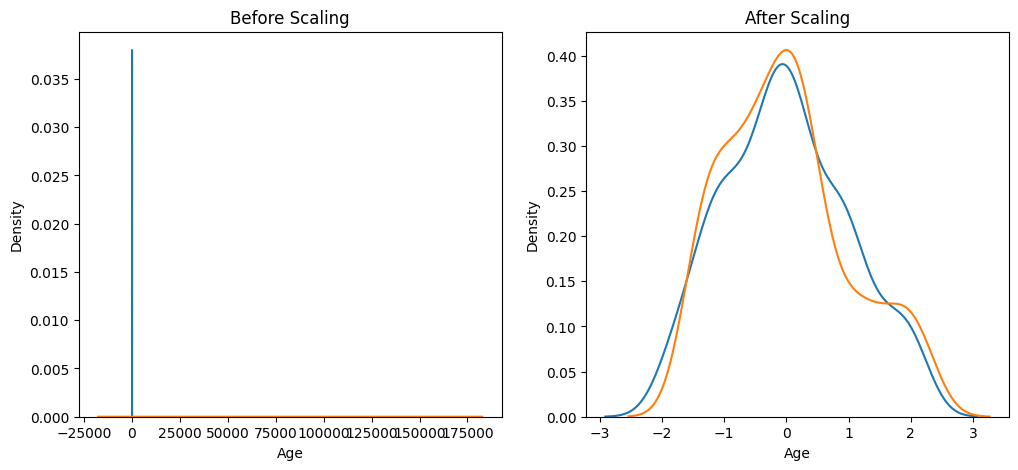

In [17]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
# before scalling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

#after scaling 
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

# comparison of distribution(no changes)


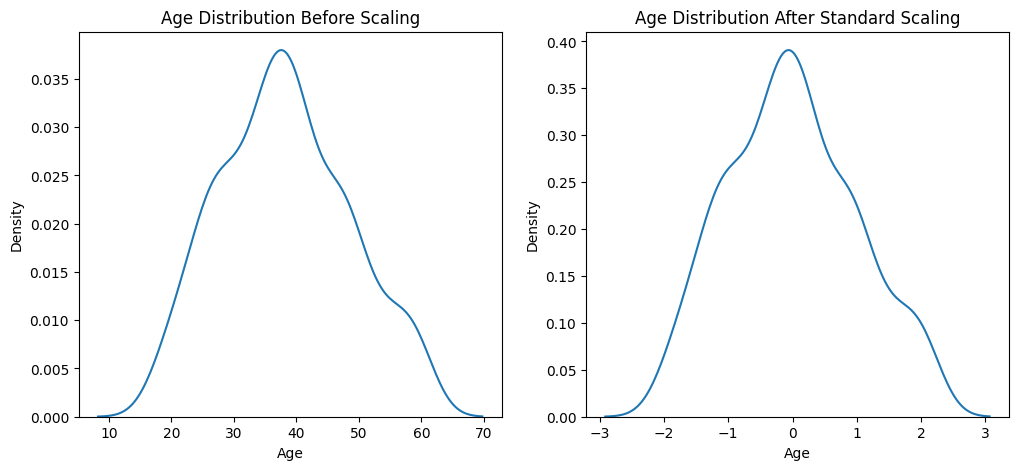

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

# why scaling important

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [22]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.725
Scaled 0.925


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [29]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [32]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9
Scaled 0.9125


In [33]:
df.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

# effect of outliers(no effect)

In [34]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_23632\2365817244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


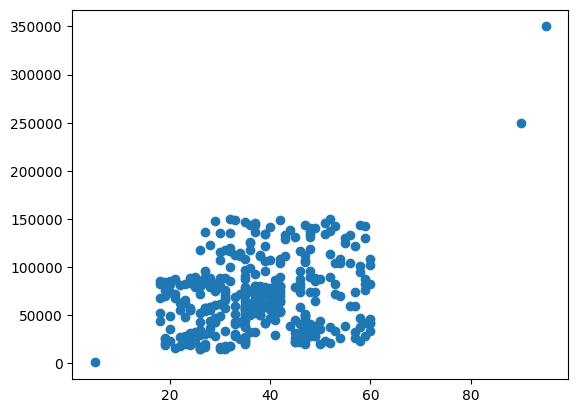

In [35]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

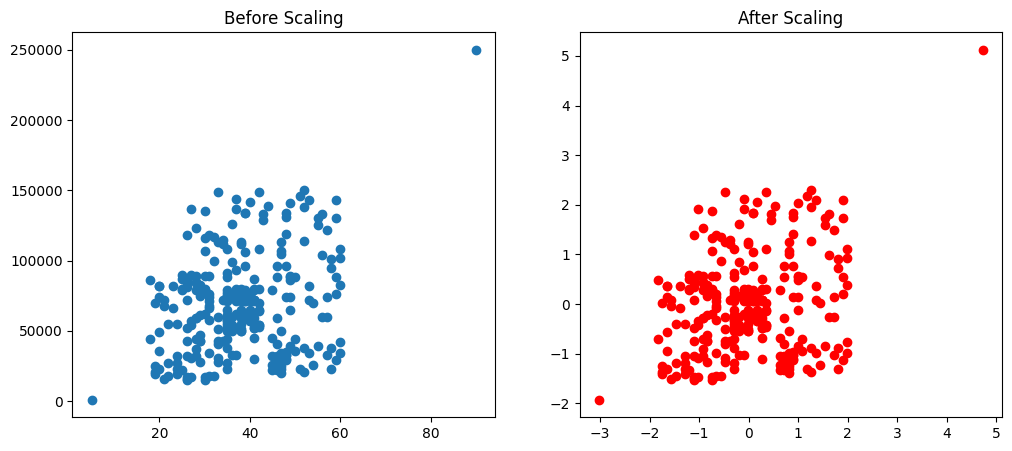

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()